In [17]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras import callbacks
import keras

# Data preprocessing

In [3]:
df = pd.read_csv('weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


## Eliminate columns that not useful

In [5]:
df = df.drop(['Formatted Date'],axis=1)

## Encode categorical data

In [7]:
X = df.drop(['Apparent Temperature (C)'], axis=1)
y = df['Apparent Temperature (C)']

le = LabelEncoder()
X['Precip Type'] = le.fit_transform(df['Precip Type'])
X['Daily Summary'] = le.fit_transform(df['Daily Summary'])
X['Summary'] = le.fit_transform(df['Summary'])
X.head()


,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,19,0,9.472222,0.89,14.1197,251.0,15.8263,0.0,1015.13,197
1,19,0,9.355556,0.86,14.2646,259.0,15.8263,0.0,1015.63,197
2,17,0,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,197
3,19,0,8.288889,0.83,14.1036,269.0,15.8263,0.0,1016.41,197
4,17,0,8.755556,0.83,11.0446,259.0,15.8263,0.0,1016.51,197


## Scale data

In [8]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,0.730769,0.0,0.506975,0.89,0.221130,0.699164,0.983,0.0,0.970135,0.924883
1,0.730769,0.0,0.505085,0.86,0.223399,0.721448,0.983,0.0,0.970613,0.924883
2,0.653846,0.0,0.505445,0.89,0.061523,0.568245,0.929,0.0,0.970909,0.924883
3,0.730769,0.0,0.487805,0.83,0.220877,0.749304,0.983,0.0,0.971358,0.924883
4,0.653846,0.0,0.495365,0.83,0.172970,0.721448,0.983,0.0,0.971454,0.924883


## Split data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0, test_size=0.3)
X_train.shape

(67517, 10)

# Build model

In [12]:
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               5632      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 180225 (704.00 KB)
Trainable params: 1802

## Optimizer

In [13]:
def create_model():
    return keras.Sequential([
        keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(1)  
    ])

In [14]:
def compile_model(optimizer):
    model = create_model()
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])
    return model

In [18]:
early_stopping = callbacks.EarlyStopping(
    monitor="val_loss",
    mode="min",
    patience=5,
    restore_best_weights=True
)

In [15]:
optimizers = ['sgd', 'adam', 'rmsprop', 'adagrad', 'adadelta']


Training model with optimizer: sgd



Test MAE with sgd optimizer: 0.2618626058101654


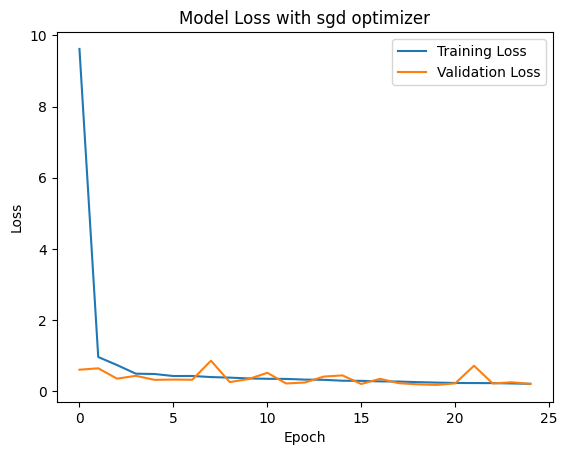


Training model with optimizer: adam
Test MAE with adam optimizer: 0.28909656405448914


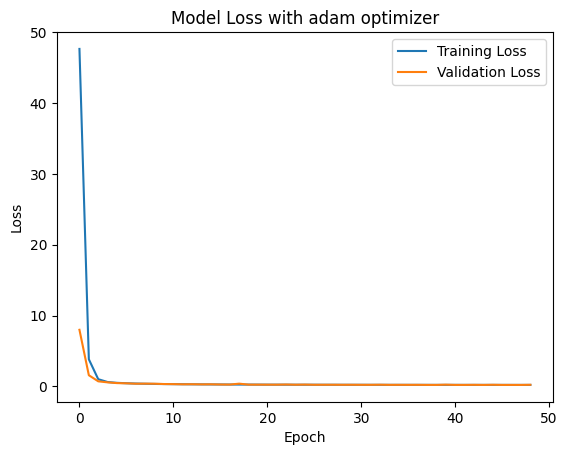


Training model with optimizer: rmsprop
Test MAE with rmsprop optimizer: 0.27732887864112854


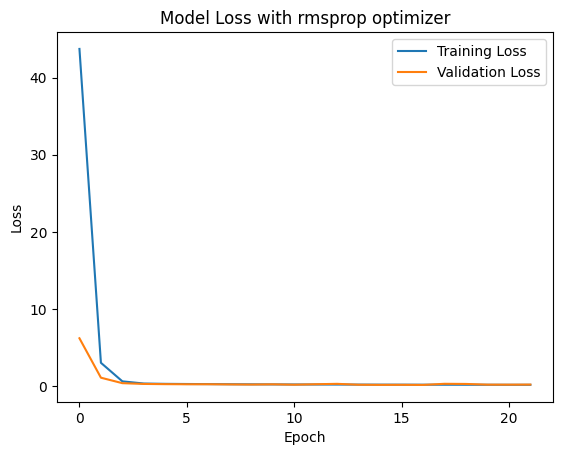


Training model with optimizer: adagrad
Test MAE with adagrad optimizer: 5.473771095275879


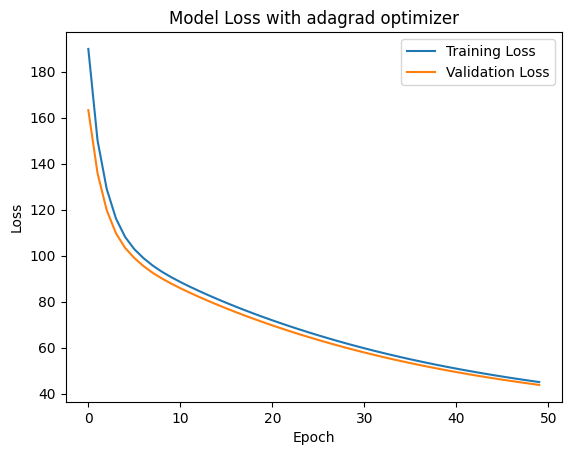


Training model with optimizer: adadelta
Test MAE with adadelta optimizer: 8.271933555603027


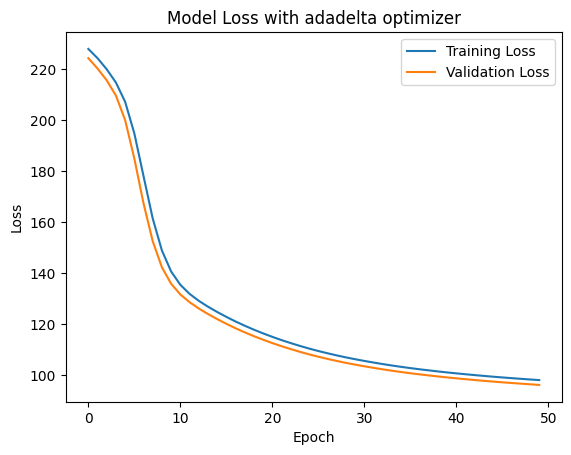

In [19]:
for optimizer in optimizers:
    print(f"\nTraining model with optimizer: {optimizer}")
    model_reg = compile_model(optimizer)
    history = model_reg.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0, callbacks=[early_stopping])
    
    test_loss_reg, test_mae_reg = model_reg.evaluate(X_test, y_test, verbose=0)
    print(f'Test MAE with {optimizer} optimizer: {test_mae_reg}')

    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model Loss with {optimizer} optimizer')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()